In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_train = pd.read_csv('GUIDE_Train.csv',nrows=100000)

In [3]:
df_train.columns = df_train.columns.str.lower()

In [4]:
df_train.head(5)

,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,mitretechniques,incidentgrade,actiongrouped,actiongranular,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,emailclusterid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,threatfamily,filename,folderpath,resourceidname,resourcetype,roles,osfamily,osversion,antispamdirection,suspicionlevel,lastverdict,countrycode,state,city
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
df_train['category'].value_counts()

category
InitialAccess          45273
Exfiltration           16556
SuspiciousActivity     10528
CommandAndControl       8694
Impact                  7950
CredentialAccess        3017
Execution               2840
Malware                 1516
Discovery               1394
Persistence              708
DefenseEvasion           508
LateralMovement          416
Ransomware               196
UnwantedSoftware         175
Collection               136
Exploit                   46
PrivilegeEscalation       45
CredentialStealing         2
Name: count, dtype: int64

In [8]:
# Convert 'incidentgrade' to numeric, forcing errors to NaN
df_train['incidentgrade'] = pd.to_numeric(df_train['incidentgrade'], errors='coerce')

# Drop rows with NaN values in 'incidentgrade' if any
df = df_train.dropna(subset=['incidentgrade'])


In [9]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame
# Grouping the data by 'category'
groups = df_train.groupby('category')['incidentgrade'].apply(list)

# Performing one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpretation of p-value
if p_value < 0.05:
    print("At least one group mean is significantly different.")
else:
    print("No significant difference between group means.")


F-statistic: nan
P-value: nan
No significant difference between group means.


In [5]:
df_train.columns

Index(['id', 'orgid', 'incidentid', 'alertid', 'timestamp', 'detectorid',
       'alerttitle', 'category', 'mitretechniques', 'incidentgrade',
       'actiongrouped', 'actiongranular', 'entitytype', 'evidencerole',
       'deviceid', 'sha256', 'ipaddress', 'url', 'accountsid', 'accountupn',
       'accountobjectid', 'accountname', 'devicename', 'networkmessageid',
       'emailclusterid', 'registrykey', 'registryvaluename',
       'registryvaluedata', 'applicationid', 'applicationname',
       'oauthapplicationid', 'threatfamily', 'filename', 'folderpath',
       'resourceidname', 'resourcetype', 'roles', 'osfamily', 'osversion',
       'antispamdirection', 'suspicionlevel', 'lastverdict', 'countrycode',
       'state', 'city'],
      dtype='object')

Frequency Distribution:
 incidentgrade
BenignPositive    43024
TruePositive      34887
FalsePositive     21564
Name: count, dtype: int64

Relative Frequency:
 incidentgrade
BenignPositive    43.251068
TruePositive      35.071123
FalsePositive     21.677808
Name: proportion, dtype: float64

Summary Statistics:
 count              99475
unique                 3
top       BenignPositive
freq               43024
Name: incidentgrade, dtype: object


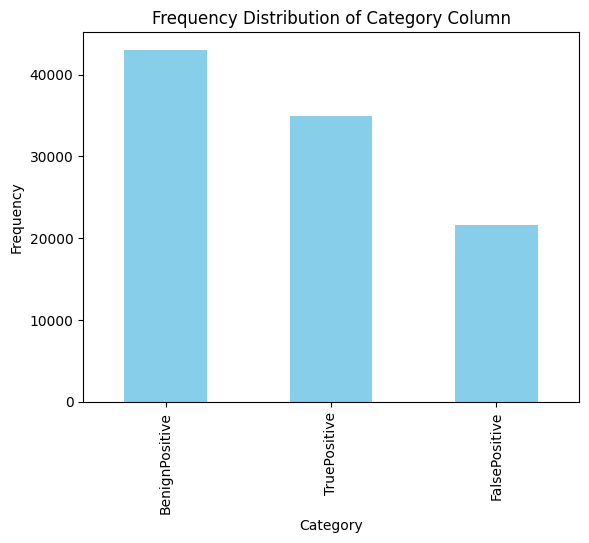

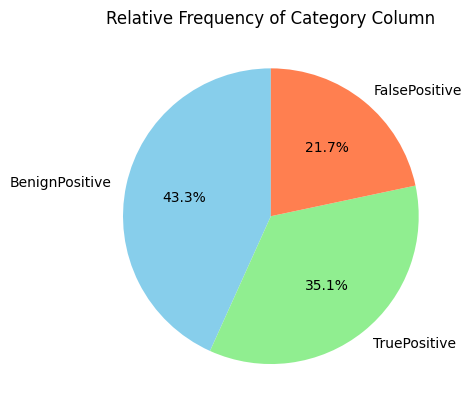

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Frequency Distribution
frequency = df_train['incidentgrade'].value_counts()
print("Frequency Distribution:\n", frequency)

# Relative Frequency
relative_frequency = df_train['incidentgrade'].value_counts(normalize=True) * 100
print("\nRelative Frequency:\n", relative_frequency)

# Summary Statistics
summary = df_train['incidentgrade'].describe()
print("\nSummary Statistics:\n", summary)

# Bar Plot
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Category Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# Pie Chart
relative_frequency.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral'])
plt.title('Relative Frequency of Category Column')
plt.ylabel('')  # Hide y-label
plt.show()

In [7]:
missing_percentage = (df_train.isna().sum() / len(df_train)) * 100

missing_percentage = missing_percentage.sort_values(ascending=False)

missing_percentage

resourcetype          99.909
actiongrouped         99.412
actiongranular        99.412
threatfamily          99.200
emailclusterid        98.984
antispamdirection     98.220
roles                 97.728
suspicionlevel        84.876
lastverdict           76.567
mitretechniques       57.496
incidentgrade          0.525
applicationid          0.000
filename               0.000
registryvaluedata      0.000
applicationname        0.000
registryvaluename      0.000
oauthapplicationid     0.000
id                     0.000
folderpath             0.000
resourceidname         0.000
registrykey            0.000
osversion              0.000
countrycode            0.000
state                  0.000
osfamily               0.000
devicename             0.000
networkmessageid       0.000
evidencerole           0.000
incidentid             0.000
alertid                0.000
timestamp              0.000
detectorid             0.000
alerttitle             0.000
category               0.000
entitytype    

In [8]:
df_train = df_train.drop(columns=['resourcetype',
 'actiongrouped',
 'actiongranular',
 'threatfamily',
 'emailclusterid',
 'antispamdirection',
 'roles',
 'suspicionlevel',
 'lastverdict',
 'mitretechniques'])

In [9]:
df_train = df_train.dropna()

In [11]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataframe is called 'df' and the column is 'incidentgrade'

# Get the value counts
value_counts = df_train['incidentgrade'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Create a list to store the balanced dataframes
balanced_dfs = []

# Undersample each class
for class_value in value_counts.index:
    class_df = df_train[df_train['incidentgrade'] == class_value]

    if len(class_df) > min_count:
        # Undersample
        undersampled_df = resample(class_df,
                                   replace=False,    # sample without replacement
                                   n_samples=min_count,
                                   random_state=42)  # reproducible results
        balanced_dfs.append(undersampled_df)
    else:
        # If this class is already at or below the minimum, keep all samples
        balanced_dfs.append(class_df)

# Combine the balanced dataframes
df_balanced = pd.concat(balanced_dfs)

# Verify the new class distribution
print(df_balanced['incidentgrade'].value_counts())

incidentgrade
BenignPositive    21564
TruePositive      21564
FalsePositive     21564
Name: count, dtype: int64


In [14]:
df_balanced['timestamp'] = pd.to_datetime(df_balanced['timestamp'])

df_balanced['year'] = df_balanced['timestamp'].dt.year
df_balanced['month'] = df_balanced['timestamp'].dt.month
df_balanced['day'] = df_balanced['timestamp'].dt.day
df_balanced['hour'] = df_balanced['timestamp'].dt.hour
df_balanced['minute'] = df_balanced['timestamp'].dt.minute

df_balanced.drop('timestamp', axis=1, inplace=True)


In [15]:
clumn = ['id', 'incidentid', 'alertid','orgid', 'detectorid',
       'alerttitle', 'category', 'entitytype', 'evidencerole',
       'deviceid', 'sha256', 'ipaddress', 'url', 'accountsid', 'accountupn',
       'accountobjectid', 'accountname', 'devicename', 'networkmessageid',
       'registrykey', 'registryvaluename', 'registryvaluedata',
       'applicationid', 'applicationname', 'oauthapplicationid', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city', 'year', 'month', 'day', 'hour', 'minute',
        'incidentgrade']

df_balanced = df_balanced[clumn]

In [16]:
categorical_column = df_balanced.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_column:
    df_balanced[col] = le.fit_transform(df_balanced[col])

In [17]:
X = df_balanced.iloc[:,:-1]
y = df_balanced.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


In [18]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
3,orgid,0.192771
1,incidentid,0.139269
2,alertid,0.099433
4,detectorid,0.097648
5,alerttitle,0.080415
35,day,0.043780
0,id,0.042042
6,category,0.038657
37,minute,0.033128
36,hour,0.032829


random forest classifier

In [19]:

model = RandomForestClassifier(class_weight='balanced', random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
def evalv():
    from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class classification

    # Calculate the Recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calculate the Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)

    # Generate the Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)

evalv()

F1 Score: 0.8843762955211321
Recall: 0.8839941262848752
Accuracy: 0.8839941262848752
Confusion Matrix:
[[3883  278  152]
 [ 357 3828  128]
 [ 412  174 3727]]


LogisticRegression

In [21]:
model = LogisticRegression(class_weight='balanced')

model.fit(X_train,y_train)

evalv()

F1 Score: 0.3927622298836817
Recall: 0.39624391374913054
Accuracy: 0.39624391374913054
Confusion Matrix:
[[1860 1271 1182]
 [1424 1221 1668]
 [1111 1156 2046]]


GaussianNB

In [22]:
model = GaussianNB()
model.fit(X_train, y_train)
evalv()


F1 Score: 0.3454143430860879
Recall: 0.3460081922868846
Accuracy: 0.3460081922868846
Confusion Matrix:
[[1417 1422 1474]
 [1338 1386 1589]
 [1321 1318 1674]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

evalv()

F1 Score: 0.6158014824097023
Recall: 0.6143442306206044
Accuracy: 0.6143442306206044
Confusion Matrix:
[[2664 1001  648]
 [1226 2535  552]
 [1015  548 2750]]


In [20]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train,y_train)

evalv()

F1 Score: 0.2611818185826466
Recall: 0.4325207338527268
Accuracy: 0.4325207338527268
Confusion Matrix:
[[8605    0    0]
 [4313    0    0]
 [6977    0    0]]


In [ ]:
# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],        # Number of trees in the forest
    'max_depth': [10, 20, None],        # Maximum depth of each tree
    'min_samples_split': [2, 5],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],       # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']      # Class weighting to handle class imbalance
}
# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Print the best F1 score achieved during Grid Search
print("Best F1 Score achieved: ", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

